In [ ]:
import kagglehub

path = kagglehub.dataset_download("yelp-dataset/yelp-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/yelp-dataset


In [ ]:
import pandas as pd
import json

data = []
with open('/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json') as fl:
    for i, line in enumerate(fl):
        data.append(json.loads(line))
        if i+1 >= 1000000:
            break
rev = pd.DataFrame(data)
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


<ipython-input-5-86a497b23c6d>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rev.resample('M', on='date').size().plot()


<function matplotlib.pyplot.show(close=None, block=None)>

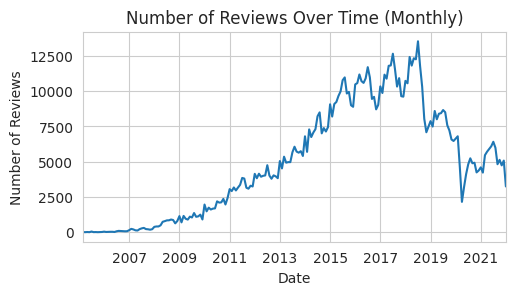

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

rev['date'] = pd.to_datetime(rev['date'])

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
rev.resample('M', on='date').size().plot()
plt.title('Number of Reviews Over Time (Monthly)')
plt.ylabel('Number of Reviews')
plt.xlabel('Date')
plt.show

In [ ]:
keeps = ["date", "stars", "text", "business_id"]
rev = rev[keeps]

rev['date'] = pd.to_datetime(rev['date']).dt.date
rev['stars'] = rev['stars'].astype(float)
rev['text'] = rev['text'].astype(str)

print(rev.iloc[8:12])

          date  stars                                               text  \
8   2016-03-30    3.0  This easter instead of going to Lopez Lake we ...   
9   2016-07-25    3.0  Had a party of 6 here for hibachi. Our waitres...   
10  2015-06-21    5.0  My experience with Shalimar was nothing but wo...   
11  2015-08-19    4.0  Locals recommended Milktooth, and it's an amaz...   

               business_id  
8   B5XSoSG3SfvQGtKEGQ1tSQ  
9   gebiRewfieSdtt17PTW6Zg  
10  uMvVYRgGNXf5boolA9HXTw  
11  EQ-TZ2eeD_E0BHuvoaeG5Q  


In [ ]:
data = []
with open('/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        data.append(json.loads(line))
        if i+1 >= 500000:
            break
business = pd.DataFrame(data)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
keeps_business = ["business_id", "name", "city", "stars", "review_count", "categories"]
business = business[keeps_business]

print(business.iloc[20:22])

               business_id                            name          city  \
20  WKMJwqnfZKsAae75RMP6jA  Roast Coffeehouse and Wine Bar      Edmonton   
21  qhDdDeI3K4jy2KyzwFN53w      Barnes & Noble Booksellers  Indianapolis   

    stars  review_count                                         categories  
20    4.0            40  Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...  
21    4.0            38   Shopping, Books, Mags, Music & Video, Bookstores  


In [ ]:
business.shape

(150346, 6)

In [ ]:
business['is_restaurant'] = business['categories'].str.contains("Restaurants", na=False)
business = business[business['is_restaurant'] == True]
print(business.iloc[143:147])

restaurant_reviews = rev[rev['business_id'].isin(business['business_id'])]

                business_id                           name           city  \
391  j9Kaj_6tSeXmVMYCgZithg                    Noble Crust  Wesley Chapel   
392  EIlFs8kybcG-l60GJjNUIA                 Domino's Pizza        Oldsmar   
394  z9wCTHYI2VZy9YIblwSsgg  The Silo Eatery Coffee Bakery          Tampa   
401  4xhGQGdGqU60BIznBjqnuA   California Tacos and Taproom     Isla Vista   

     stars  review_count                                         categories  \
391    4.5           496  Restaurants, Italian, Nightlife, Southern, Bar...   
392    2.5            20      Pizza, Chicken Wings, Restaurants, Sandwiches   
394    4.0             5   Coffee & Tea, Restaurants, Food, Cafes, Bakeries   
401    4.0            49  Mexican, Beer Bar, Bars, Sports Bars, Nightlif...   

     is_restaurant  
391           True  
392           True  
394           True  
401           True  


In [ ]:
business.shape

(52268, 7)

In [ ]:
restaurant_reviews.shape

(689501, 4)

#EDA

In [ ]:
mean_review_count = business['review_count'].mean()
print(mean_review_count)

87.26714241983623


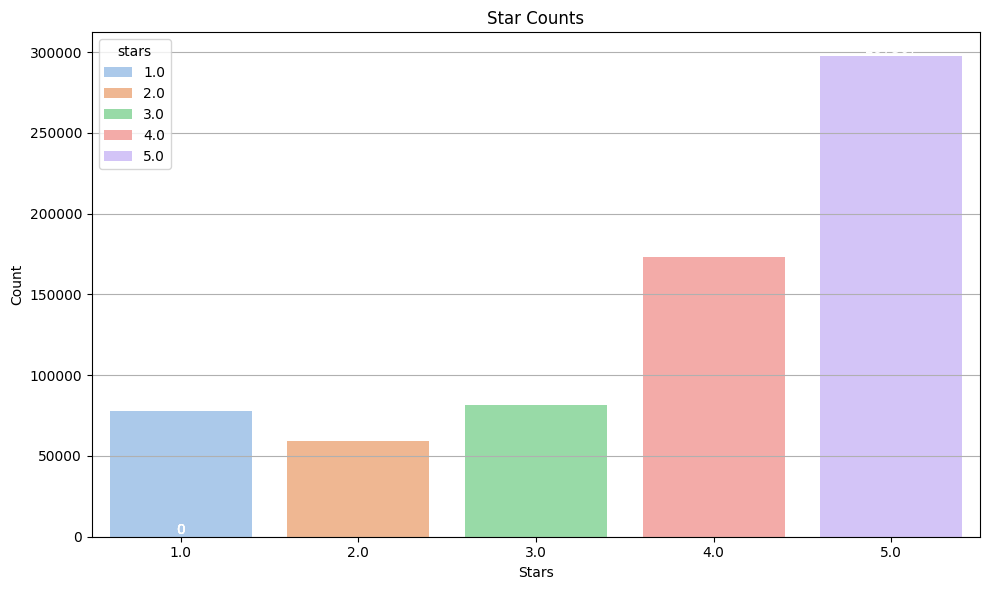

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=restaurant_reviews, x='stars', hue='stars', palette='pastel', dodge=False)
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', color='white')

plt.title("Star Counts")
plt.xlabel("Stars")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#Text Pre-processing


##Removing non_english reviews

In [ ]:
#pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=c899e1f23458d20f9a17b883dfa61966286745af32218efb5fe5d75052698f45
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import pandas as pd
from langdetect import detect
from tqdm import tqdm

restaurant_reviews = restaurant_reviews[:50000]
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

tqdm.pandas(desc="Detecting language")

restaurant_reviews['language'] = restaurant_reviews['text'].progress_apply(detect_language)
print(restaurant_reviews)

Detecting language: 100%|██████████| 50000/50000 [03:29<00:00, 238.51it/s]

             date  stars                                               text  \
0      2018-07-07    3.0  If you decide to eat here, just be aware it is...   
2      2014-02-05    3.0  Family diner. Had the buffet. Eclectic assortm...   
3      2015-01-04    5.0  Wow!  Yummy, different,  delicious.   Our favo...   
4      2017-01-14    4.0  Cute interior and owner (?) gave us tour of up...   
5      2015-09-23    1.0  I am a long term frequent customer of this est...   
...           ...    ...                                                ...   
69256  2017-10-14    1.0  Not a good experience. My friend got a large g...   
69257  2017-01-30    5.0  We went for breakfast on a recent trip to New ...   
69259  2014-06-29    5.0  My five stars are based on drinks, service, an...   
69260  2013-02-01    5.0  Seriously THE BEST mexican place in town! I fo...   
69261  2016-10-02    5.0  One of my favorite bars in Philly! Got brunch ...   

                  business_id language  
0      XQf

<ipython-input-16-e29843ed1bc6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_counts, x='count', y='language', palette='viridis')


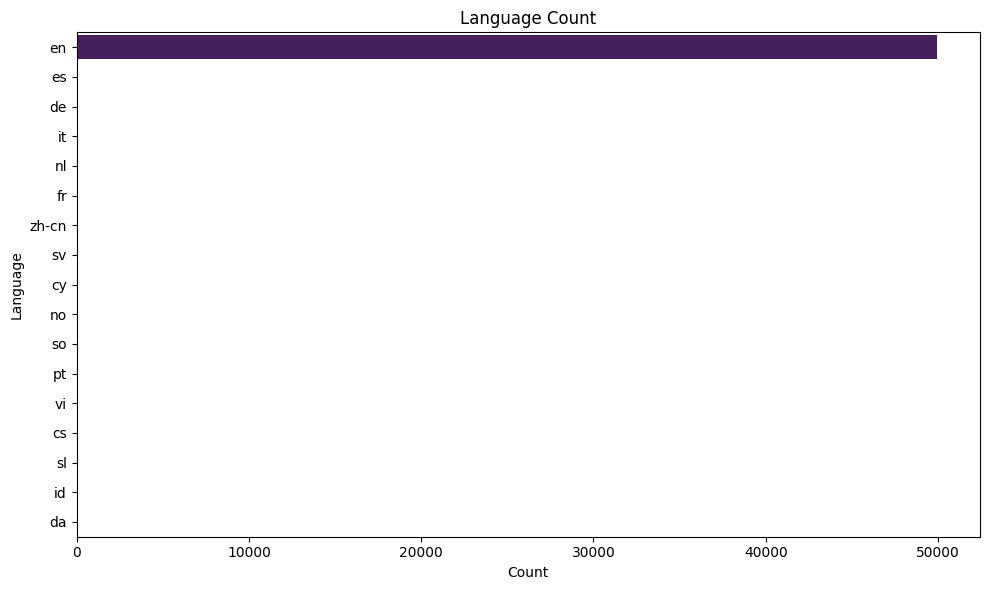

In [ ]:
language_counts = restaurant_reviews['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=language_counts, x='count', y='language', palette='viridis')

plt.title("Language Count")
plt.xlabel("Count")
plt.ylabel("Language")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
foreignText = restaurant_reviews[~restaurant_reviews['language'].isin(['en'])]
print(foreignText.iloc[4:7])

             date  stars                                               text  \
9237   2016-07-04    2.0  点了四个菜 没一个好吃的 不适合中国人吃\n\n口水鸡鸡肉不新鲜\n毛血旺的大肠好油\n酸豆...   
9933   2013-07-14    4.0                         BBQ good lawd have mercy !   
10274  2017-07-18    5.0  O05 hj 0fp Ncc83bb0 hk \nj6BChbhnnp phmyj9g5 6...   

                  business_id language  
9237   A9rVxmIBtHZRvNhbBaGAWg    zh-cn  
9933   pPFv6CTFK5i8FNj8f3_pVg       cy  
10274  8uF-bhJFgT4Tn6DTb27viA       vi  


In [ ]:
restaurant_reviews = restaurant_reviews[restaurant_reviews['language'].isin(['en'])]
print(restaurant_reviews.shape)

(49944, 5)


##Creating Output variable (Sentiment) from Star rating

In [ ]:
restaurant_reviews = restaurant_reviews[restaurant_reviews['stars'] != 3]
restaurant_reviews_for_anomalies = restaurant_reviews.copy()
print(restaurant_reviews.shape)

(43668, 5)


In [ ]:
restaurant_reviews['positive'] = restaurant_reviews['stars'] > 3
positive_counts = restaurant_reviews['positive'].value_counts()
print(positive_counts)

positive
True     34285
False     9383
Name: count, dtype: int64


##Creating input variables - Bag of Words approach

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk
import pandas as pd

nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))

    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    return ' '.join(words)

restaurant_reviews['processed_text'] = restaurant_reviews['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
restaurant_reviews

,date,stars,text,business_id,language,positive,processed_text
3,2015-01-04,5.0,"Wow! Yummy, different, delicious. Our favo...",kxX2SOes4o-D3ZQBkiMRfA,en,True,wow yummi differ delici favorit lamb curri kor...
4,2017-01-14,4.0,Cute interior and owner (?) gave us tour of up...,e4Vwtrqf-wpJfwesgvdgxQ,en,True,cute interior owner gave us tour upcom patioro...
5,2015-09-23,1.0,I am a long term frequent customer of this est...,04UD14gamNjLY0IDYVhHJg,en,False,long term frequent custom establish went order...
7,2015-08-07,5.0,Amazingly amazing wings and homemade bleu chee...,LHSTtnW3YHCeUkRDGyJOyw,en,True,amazingli amaz wing homemad bleu chees ribey t...
11,2015-08-19,4.0,"Locals recommended Milktooth, and it's an amaz...",EQ-TZ2eeD_E0BHuvoaeG5Q,en,True,local recommend milktooth amaz jewel indianapo...
...,...,...,...,...,...,...,...
69256,2017-10-14,1.0,Not a good experience. My friend got a large g...,37BpNvlEAT6WVGsksrHbBQ,en,False,good experi friend got larg glass ice water sp...
69257,2017-01-30,5.0,We went for breakfast on a recent trip to New ...,g04aAvgol7IW8buqSbT4xA,en,True,went breakfast recent trip new orlean wife ord...
69259,2014-06-29,5.0,"My five stars are based on drinks, service, an...",lj-E32x9_FA7GmUrBGBEWg,en,True,five star base drink servic atmospher eat trip...
69260,2013-02-01,5.0,Seriously THE BEST mexican place in town! I fo...,uO39--k_hrCFgZh-Bl8m8A,en,True,serious best mexican place town found place ri...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from scipy.sparse import csr_matrix

vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(restaurant_reviews['processed_text'])

min_df = 1 - 0.99
vectorizer = CountVectorizer(min_df=min_df)
dtm = vectorizer.fit_transform(restaurant_reviews['processed_text'])

reviews_sparse = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
reviews_sparse.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_')
                          for col in reviews_sparse.columns]

In [ ]:
reviews_sparse['positive'] = restaurant_reviews['positive'].values

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(86)

train, test = train_test_split(
    reviews_sparse,
    test_size=0.2,
    stratify=reviews_sparse['positive'],
    random_state=86
)
train, valid = train_test_split(
    train,
    test_size=0.2,
    stratify=train['positive'],
    random_state=86
)

In [ ]:
print(train.shape)
print(test.shape)

(27947, 793)
(8734, 793)


In [ ]:
X_train = train.drop(columns=['positive'])
y_train = train['positive']

X_valid = valid.drop(columns=['positive'])
y_valid = valid['positive']

X_test = test.drop(columns=['positive'])
y_test = test['positive']

In [ ]:
train['positive'].value_counts()

print("Class distribution in training set:")
print(train['positive'].value_counts())

train['positive'].value_counts().to_frame()

Class distribution in training set:
positive
True     21942
False     6005
Name: count, dtype: int64


,count
positive,
True,21942
False,6005


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def DNN(input_shape=(792,)):
    model = Sequential([
        Dense(1024, activation='relu', input_shape=input_shape,
              kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.6),

        Dense(768, kernel_regularizer=l2(0.001)),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.55),

        Dense(512, kernel_regularizer=l2(0.001)),
        PReLU(),
        BatchNormalization(),
        Dropout(0.5),

        Dense(256, kernel_regularizer=l2(0.001)),
        LeakyReLU(alpha=0.1),
        BatchNormalization(),
        Dropout(0.4),

        Dense(128, kernel_regularizer=l2(0.001)),
        PReLU(),
        BatchNormalization(),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.0001)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', 'Precision', 'Recall']
    )

    return model

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]



In [ ]:
model = DNN()
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=30,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

loss, accuracy, precision, recall = model.evaluate(X_valid, y_valid, verbose=0)
print(f"\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - Precision: 0.8039 - Recall: 0.5592 - accuracy: 0.5460 - loss: 3.7921 - val_Precision: 0.7992 - val_Recall: 0.9960 - val_accuracy: 0.8003 - val_loss: 3.4003 - learning_rate: 1.0000e-04
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - Precision: 0.8490 - Recall: 0.6890 - accuracy: 0.6586 - loss: 3.5086 - val_Precision: 0.8336 - val_Recall: 0.9911 - val_accuracy: 0.8377 - val_loss: 3.2138 - learning_rate: 1.0000e-04
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - Precision: 0.8858 - Recall: 0.8001 - accuracy: 0.7605 - loss: 3.3127 - val_Precision: 0.8753 - val_Recall: 0.9841 - val_accuracy: 0.8775 - val_loss: 3.0484 - learning_rate: 1.0000e-04
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - Precision: 0.9096 - Recall: 0.8755 - accuracy: 0.8345 - loss: 3.1281 - val_Precision: 0.9053 - val_Recall: 0.9796 - val_accuracy: 0.9035 - val_loss: 2.9373 - learning_rate: 1.0000e-04
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=['Negative', 'Positive']))

Accuracy: 0.9358
Precision: 0.9518
Recall: 0.9672

Confusion Matrix:
[[1541  336]
 [ 225 6632]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.82      0.85      1877
    Positive       0.95      0.97      0.96      6857

    accuracy                           0.94      8734
   macro avg       0.91      0.89      0.90      8734
weighted avg       0.93      0.94      0.94      8734



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall

X_train_np = X_train.values
X_valid_np = X_valid.values

X_train_cnn = X_train_np.reshape(X_train_np.shape[0], X_train_np.shape[1], 1)
X_valid_cnn = X_valid_np.reshape(X_valid_np.shape[0], X_valid_np.shape[1], 1)

model2 = Sequential([
    Conv1D(128, kernel_size=3, activation='relu', input_shape=(793, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

model2.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_24 (Conv1D)              │ (None, 791, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 791, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 395, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 395, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ (None, 393, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 393, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 196, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 196, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 828,865 (3.16 MB)

 Trainable params: 828,481 (3.16 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
history = model2.fit(
    X_train_cnn, y_train,
    validation_data=(X_valid_cnn, y_valid),
    epochs=10,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

loss, accuracy, precision, recall = model2.evaluate(X_valid_cnn, y_valid, verbose=0)
print(f"\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Epoch 1/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 172s 193ms/step - accuracy: 0.8477 - loss: 0.4176 - precision: 0.8873 - recall: 0.9248 - val_accuracy: 0.9143 - val_loss: 0.2147 - val_precision: 0.9361 - val_recall: 0.9561 - learning_rate: 0.0010
Epoch 2/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 192s 182ms/step - accuracy: 0.9132 - loss: 0.2157 - precision: 0.9346 - recall: 0.9570 - val_accuracy: 0.9138 - val_loss: 0.2215 - val_precision: 0.9578 - val_recall: 0.9313 - learning_rate: 0.0010
Epoch 3/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 155s 177ms/step - accuracy: 0.9240 - loss: 0.1944 - precision: 0.9420 - recall: 0.9624 - val_accuracy: 0.9233 - val_loss: 0.1912 - val_precision: 0.9432 - val_recall: 0.9601 - learning_rate: 0.0010
Epoch 4/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 157s 180ms/step - accuracy: 0.9313 - loss: 0.1721 - precision: 0.9476 - recall: 0.9660 - val_accuracy: 0.9253 - val_loss: 0.1868 - val_precision: 0.9427 - val_recall: 0.9634 - learning_rate: 0.0010
Epoch 5/10
874/874 ━━━━━━━━━━━━━━━━━━━━ 215s 195

In [ ]:
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}\n")

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=['Negative', 'Positive']))

273/273 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step
Accuracy: 0.9252
Precision: 0.9399
Recall: 0.9666

Confusion Matrix:
[[1453  424]
 [ 229 6628]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.77      0.82      1877
    Positive       0.94      0.97      0.95      6857

    accuracy                           0.93      8734
   macro avg       0.90      0.87      0.88      8734
weighted avg       0.92      0.93      0.92      8734



**Sentiment Analysis + Geospatial Analysis**

In [ ]:
df_anomalies = pd.read_csv('/home/top_20_anomalies.csv')
df_anomalies.head()

,business_id,name,stars,predicted_stars,residual,anomaly_score
0,_aKr7POnacW_VizRKBpCiA,Blues City Deli,5.0,3.598250,1.401750,9.671686
1,gP_oWJykA2RocIs_GurKWQ,Yats,5.0,3.504223,1.495777,9.627045
2,8QqnRpM-QxGsjDNuu0E57A,Carlillos Cocina,5.0,3.572421,1.427579,9.542811
3,DVBJRvnCpkqaYl6nHroaMg,Tumerico,5.0,3.599719,1.400281,9.185303
4,OR7VJQ3Nk1wCcIbPN4TCQQ,Smiling With Hope Pizza,5.0,3.556041,1.443959,9.049582


In [ ]:
anomalies = restaurant_reviews[restaurant_reviews['business_id'].isin(df_anomalies['business_id'])]
anomalies

,date,stars,text,business_id,language,positive,processed_text
163,2013-05-29,5.0,By far the best deli I have ever been to in th...,_aKr7POnacW_VizRKBpCiA,en,True,far best deli ever us yep us lot crazi choic o...
296,2017-08-16,5.0,Found this place on Yelp. The reviews speak fo...,_aKr7POnacW_VizRKBpCiA,en,True,found place yelp review speak true sandwich re...
860,2018-05-28,5.0,Best sandwiches in St.Louis! Could eat here ev...,_aKr7POnacW_VizRKBpCiA,en,True,best sandwich stloui could eat everyday alway ...
2473,2016-02-23,5.0,"Great selection of sandwiches, all fresh and t...",_aKr7POnacW_VizRKBpCiA,en,True,great select sandwich fresh tasti also good sa...
3032,2012-09-10,4.0,Cute neighborhood and we found parking relativ...,_aKr7POnacW_VizRKBpCiA,en,True,cute neighborhood found park rel easi price re...
...,...,...,...,...,...,...,...
65551,2011-03-24,5.0,Went there w a group including a vegetarian. ...,_aKr7POnacW_VizRKBpCiA,en,True,went w group includ vegetarian excel sandwich ...
66732,2015-10-21,5.0,You can't make a bad decision here. It's just ...,_aKr7POnacW_VizRKBpCiA,en,True,cant make bad decis possibl great sandwich che...
67809,2018-07-18,5.0,We got the black and blue and the Memphis Stax...,_aKr7POnacW_VizRKBpCiA,en,True,got black blue memphi stax absolut fantast sup...
68144,2017-05-01,5.0,I go here regularly because the service and th...,_aKr7POnacW_VizRKBpCiA,en,True,go regularli servic food phenomen owner employ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer_original = CountVectorizer(min_df=1-0.99)
dtm_train = vectorizer_original.fit_transform(restaurant_reviews['processed_text'])
reviews_sparse = pd.DataFrame(dtm_train.toarray(), columns=vectorizer_original.get_feature_names_out())

training_vocabulary = vectorizer_original.vocabulary_

vectorizer_new = CountVectorizer(vocabulary=training_vocabulary)
dtm_anomalies = vectorizer_new.fit_transform(anomalies['processed_text'])

anomalies_reviews_sparse = pd.DataFrame(
    dtm_anomalies.toarray(),
    columns=vectorizer_new.get_feature_names_out()
)

anomalies_reviews_sparse.columns = [
    col.replace(' ', '_').replace('-', '_').replace('.', '_')
    for col in anomalies_reviews_sparse.columns
]

anomalies_reviews_sparse['positive'] = anomalies['positive'].values

In [ ]:
X_anomalies = anomalies_reviews_sparse.drop(columns=['positive'])

In [ ]:
y_pred_anomalies = model.predict(X_anomalies)
y_pred_anomalies = (y_pred_anomalies > 0.5)
y_pred_anomalies

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

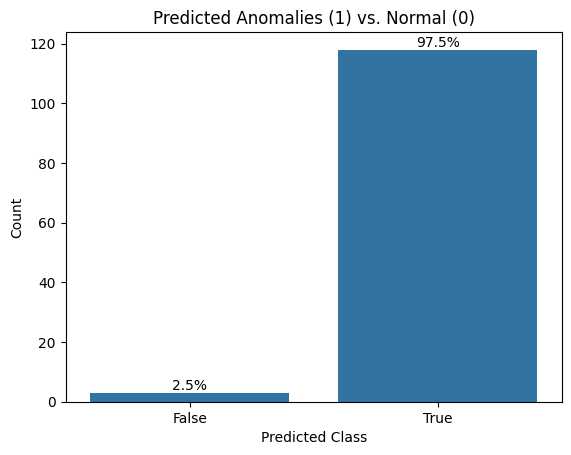

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred_1d = y_pred_anomalies.flatten()
ax = sns.countplot(x=y_pred_1d)

total = len(y_pred_1d)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.title("Predicted Anomalies (1) vs. Normal (0)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()

         word  count
584  sandwich    163
510     place     78
391      line     74
301     great     74
297      good     57
79       blue     52
288       get     52
699      time     51
294        go     50
474     order     46
266      food     44
68       best     43
22      alway     42
126      citi     36
405      love     34
743      wait     32
64       beef     31
604    servic     30
278  friendli     30
51       back     30


<ipython-input-89-dcb141162234>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words.head(20), x='count', y='word', palette='viridis')


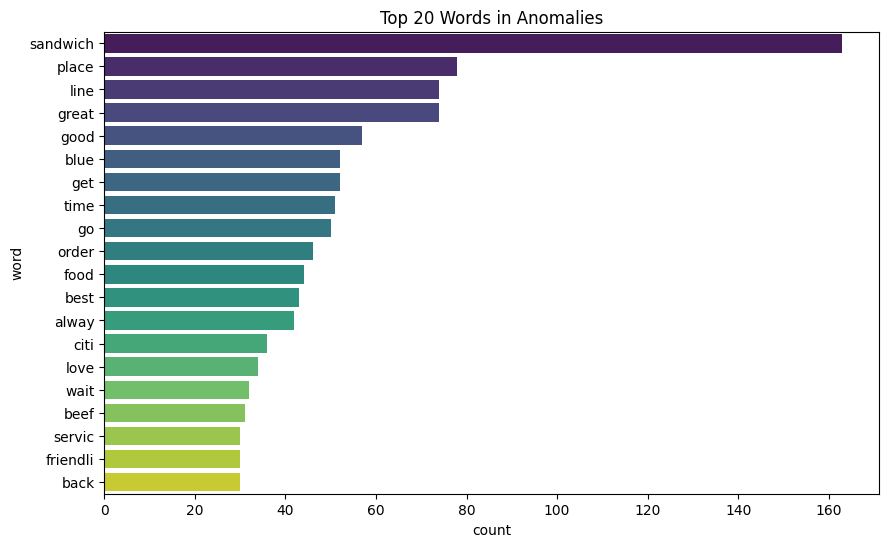

In [ ]:
word_counts = anomalies_reviews_sparse.drop(columns=['positive']).sum(axis=0)
top_words = pd.DataFrame({'word': word_counts.index, 'count': word_counts.values}) \
              .sort_values('count', ascending=False)

print(top_words.head(20))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_words.head(20), x='count', y='word', palette='viridis')
plt.title('Top 20 Words in Anomalies')
plt.show()